In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

1. Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.

In [6]:
data = pd.read_csv('conversion.csv')
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [9]:
data.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [11]:
data.shape

(1143, 11)

In [15]:
data.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [23]:
data.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

2. Постройте график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения.

In [29]:
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Impressions', ylabel='Count'>

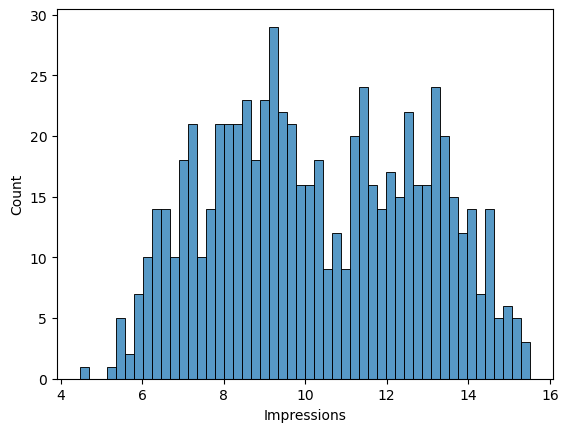

In [166]:
sns.histplot(data = np.log(data.groupby('fb_campaign_id').Impressions.sum()),bins = 50)

3.	Создайте новую колонку c CTR. Посмотрите на описательные статистики и распределение.

In [60]:
data['CTR'] = (data['Clicks'] / data['Impressions'])

In [62]:
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242


In [64]:
data.CTR.describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: CTR, dtype: float64

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CTR', ylabel='Count'>

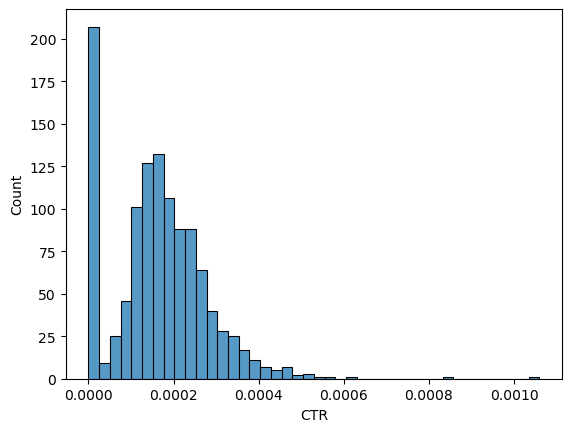

In [88]:
sns.histplot(data.CTR)

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CTR', ylabel='Count'>

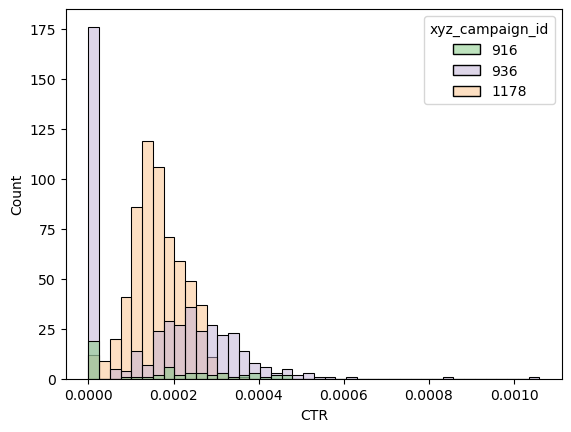

In [172]:
sns.histplot(x = data.CTR, hue = data['xyz_campaign_id'], palette = 'Accent')

4.	Проанализируйте CTR с разбивкой по рекламной кампании.

In [93]:
data.groupby('xyz_campaign_id').CTR.mean()

xyz_campaign_id
916     0.000180
936     0.000165
1178    0.000162
Name: CTR, dtype: float64

5.	Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения, используя меры центральной тенденции и меры изменчивости. 

In [110]:
data['CPC'] = (data['Spent'] / data['Clicks']).dropna()

In [112]:
data.CPC.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

In [182]:
data.CPC.dropna().quantile(0.75) - data.CPC.dropna().quantile(0.25)

0.2543636990499998

In [126]:
data.iloc[data.CPC.idxmin()]

ad_id                    777105
xyz_campaign_id             936
fb_campaign_id           115615
age                       45-49
gender                        M
interest                     63
Impressions                4333
Clicks                        1
Spent                      0.18
Total_Conversion              1
Approved_Conversion           1
CTR                    0.000231
CPC                        0.18
Name: 267, dtype: object

6.	Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. 

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CPC', ylabel='Count'>

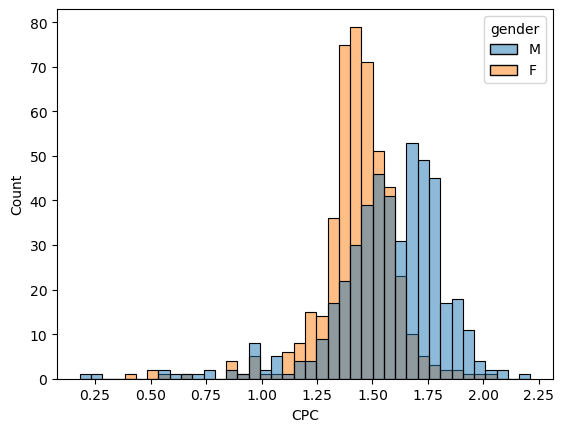

In [184]:
sns.histplot(x = data.CPC.dropna(), hue = data.gender)

7.	Посчитайте конверсию из клика в покупку.

In [156]:
data['conversion'] = (data['Approved_Conversion'] / data['Clicks']).dropna()

In [158]:
data.conversion.describe()

count    1007.000000
mean             inf
std              NaN
min         0.000000
25%         0.000000
50%         0.018018
75%         0.100000
max              inf
Name: conversion, dtype: float64